<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/textbook_practice/10_nn_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=1, penalty=None)
sgd_clf.fit(X,y)

y_pred2 = sgd_clf.predict([[2, 0.5]])
y_pred2

array([1])

- Perceptron 클래스는 위와 같은 속성을 가진 SGDClassifier와 동일하다.

In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.0'

### 시퀀셜 API를 사용한 분류 모델

#### __케라스를 사용하여 데이터셋 적재하기__

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_train_full.dtype

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), dtype('uint8'))

- 784크기의 1D배열이 아니라 28X28 크기의 2D배열
- 픽셀이 정수(0에서 255까지) 표현되어 있음

valid set 만들기 & 픽셀의 강도를 0~1로 변환(자동으로 실수로 변환됨)

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

레이블의 클래스 이름을 리스트로 만들기

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

이미지 출력

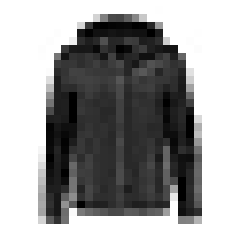

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
class_names[y_train[0]]

'Coat'

여러 이미지 출력

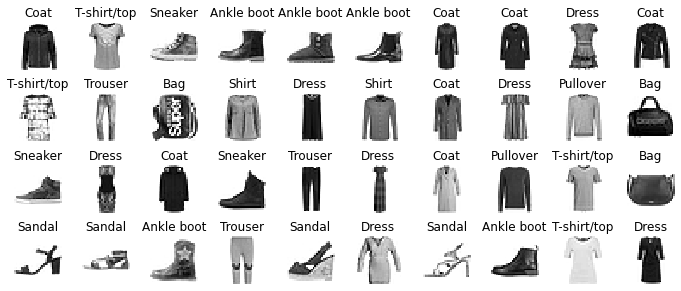

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

시퀀셜 API를 사용하여 모델 만들기

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- Flatten 층은 입력 이미지(28x28)를 1D 배열로 변환한다.(즉, X를 입력 받으면 X.reshape(-1,1)
- 출력층의 활성화함수는 __softmax__(다중분류이므로)
- 만약 이진분류 문제라면 __activation="sigmoid"__

Sequential 모델을 만들 때 층의 리스트를 전달(위와 동일)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])

__summary()__ 메서드는 모델에 있는 모든 층을 출력

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델에 있는 층의 리스트를 출력하고, 인덱스로 층을 쉽게 선책 가능

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

이름으로 층을 선택

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

층의 모든 파라미터는 __get_weigths()__ 메서드와 __set_weights()__ 메서드를 사용해 접근 가능

In [ ]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[-0.0535059 , -0.03650998,  0.04032081, ..., -0.06516179,
         -0.03573053,  0.00738069],
        [ 0.06798029, -0.01937683, -0.05908518, ...,  0.03561647,
         -0.04432688, -0.01917767],
        [-0.00361338, -0.03403734, -0.03103612, ..., -0.00357581,
         -0.06371403, -0.04277024],
        ...,
        [-0.01651775, -0.07258897,  0.05781567, ...,  0.04282758,
         -0.00126609,  0.04419353],
        [-0.0424544 ,  0.04708742,  0.05443111, ...,  0.01102845,
         -0.00099654,  0.04244958],
        [-0.04198625,  0.02040362, -0.02099651, ..., -0.06497894,
         -0.07141092, -0.05685672]], dtype=float32), (784, 300))

In [ ]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

#### 모델 컴파일

__compile()__ 메서드를 호출하여 손실함수와 옵티마이저를 지정

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- 레이블이 0에서 9까지 정수이고, 클래스가 배타적이므로 __loss="sparse_categorical_crossentropy"__
- 만약 레이블이 클래스가 2일 때 [0, 0, 1, ..., 0]과 같이 one-hot 벡터라면, __loss="categorical_crossentropy"__
- 레이블이 이진분류라면, __loss="binary_crossentropy"__
- optimizer="sgd"는 확률적 경사하강법

SGD 옵티마이저에서 학습률 바꾸기

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=[keras.metrics.sparse_categorical_accuracy])

#### 모델 훈련과 평가


In [ ]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0091 - sparse_categorical_accuracy: 0.6811 - val_loss: 0.5052 - val_sparse_categorical_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5021 - sparse_categorical_accuracy: 0.8277 - val_loss: 0.4902 - val_sparse_categorical_accuracy: 0.8256
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4517 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.4124 - val_sparse_categorical_accuracy: 0.8620
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.8534 - val_loss: 0.3874 - val_sparse_categorical_accuracy: 0.8684
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3947 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.3789 - val_sparse_categorical_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - spars

- 어떤 클래스는 많고 어떤 클래스는 적은 훈련 데이터라면(imblanced), __fit()__ 메서드를 호출할 때 __class_weight__ 매개변수를 지정하는 것이 좋다.(적게 등장하는 클래스는 높은 가중치, 많이 등장하는 클래스는 낮은 가중치)
- __sample_weight__ 매개변수를 지정하여 샘플별 가중치 조정 가능

__histroy__ 객체에는 훈련 파라미터(__history.params__), 수행된 에포크 리스트(__history.epoch__)가 포함되어있다. <br>
또한 훈련 세트와 검정 세트(있다면)에 대한 손실과 측정 지표를 담은 딕셔너리(__history.history__)가 있다. 다음과 같이 그림으로 그릴 수 있다.

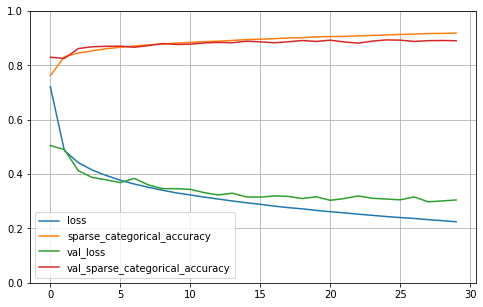

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- 검증 손실은 에포크가 끝난 후에 계산되고, 훈련 손실은 에포크가 진행되는 동안 계산된다. 따라서 훈련 곡선은 에포크 절반 만큼 왼쪽으로 이동해서 봐야한다.
- 모델 성능이 만족스럽지 못하면 하이퍼파라미터를 튜닝해보자(학습률 우선으로)

상용 환경으로 배포하기 전, 테스트 세트로 모델을 평가하여 일반화 오차를 추정

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3351 - sparse_categorical_accuracy: 0.8808


[0.33514004945755005, 0.8808000087738037]

- 검증 세트에서 하이퍼파라미터 튜닝을 했으므로, 일반적으로 검증 세트보다 테스트 세트에서 성능이 조금 낮은 것이 일반적이다.
- 이 예제에선 튜닝과정이 없었기 때문에 테스트 세트의 성능이 낮은 것은 우연의 결과다.

#### 모델을 사용해 예측 만들기

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### 시퀀셜 API를 사용한 회귀 모델

__데이터 적재__

2장에서 사용한 데이터에서 범주형 변수인 ocean_proximity 특성이 제외, 결측치 또한 없음

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

__컴파일, 훈련, 평가__

이 데이터 셋은 잡음이 많기 때문에(어떻게 알지?), 하나의 은닉층만 사용

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4601 - val_loss: 0.6306
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 2.5066 - val_loss: 0.5448
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5246 - val_loss: 0.5008
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5125 - val_loss: 0.4741
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4670 - val_loss: 0.4658
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4451 - val_loss: 0.4560
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4217 - val_loss: 0.4463
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4253 - val_loss: 0.4392
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4459 - val_loss: 0.4333
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4143 - val_loss: 0.4273

In [ ]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 789us/step - loss: 0.3540


0.35396307706832886

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[1.0864019],
       [2.838966 ],
       [1.9581592]], dtype=float32)

### 함수형 API를 사용한 모델

신경망을 단순히 순차적으로 나열하지 않고, 복잡한 패턴을 가진 규칙을 학습할 수 있다.

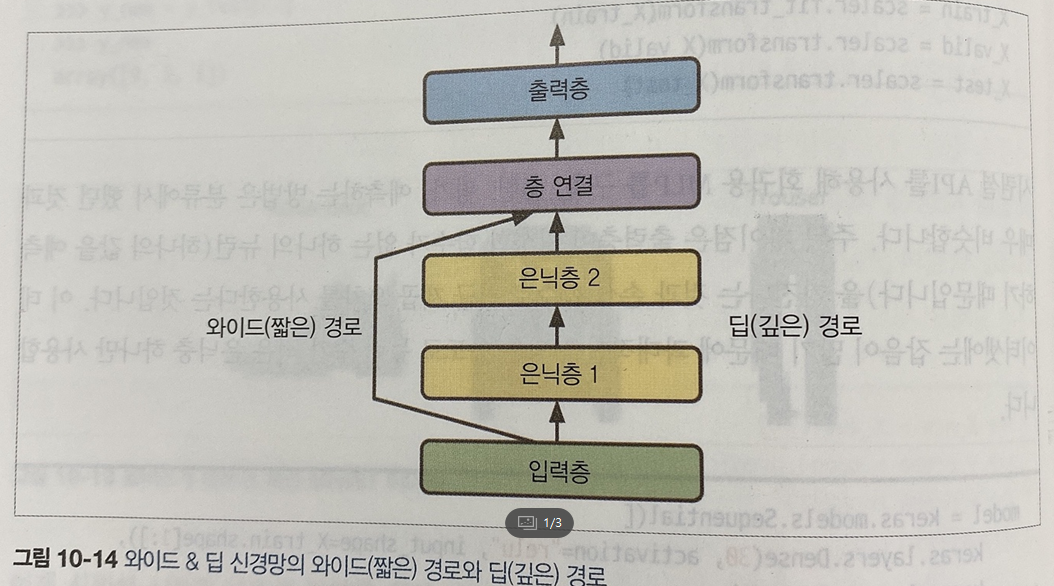

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # input_을 입력층으로
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # hidden1을 입력층으로
concat = keras.layers.concatenate([input_, hidden2]) # input_과 hidden2를 입력층으로
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

- Input 객체를 만들어 shape을 지정
- hidden1, hidden2 생성(입력층은 각각 input과 hidden1이고, 여기까지는 시퀀셜과 동일)
- concat은 input_과 hidden1을 입력층으로 받는다

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_11[0][0]               

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9916 - val_loss: 0.6919
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6698 - val_loss: 0.6462
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6397 - val_loss: 0.6052
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6087 - val_loss: 0.5876
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5939 - val_loss: 0.5688
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 0.5563
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5433 - val_loss: 0.5463
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5445 - val_loss: 0.5340
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5402 - val_loss: 0.5259
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5101 - val_loss: 0.5196

In [ ]:
mse_test

0.4346391558647156

앞서 진행한 와이드나 딥 경로에 다른 입력 특성을 전달해보자 (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달한다. 여기서 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달한다.

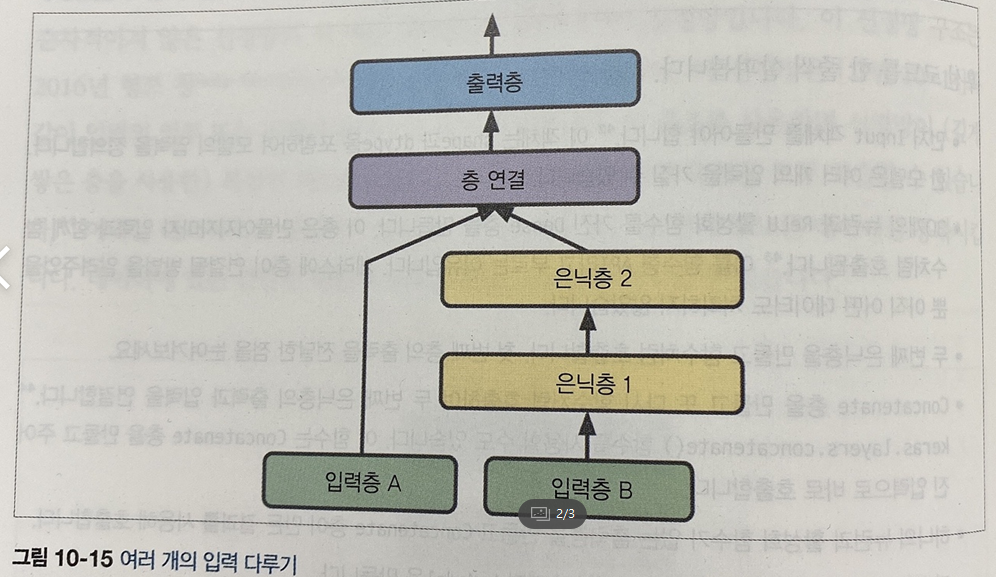

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.1095 - val_loss: 0.8032
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7516 - val_loss: 0.6791
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6484 - val_loss: 0.6142
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6155 - val_loss: 0.5904
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5937 - val_loss: 0.5706
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5635 - val_loss: 0.5568
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5492
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5468 - val_loss: 0.5375
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5438 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5142 - val_loss: 0.5262

In [ ]:
mse_test

0.4523044228553772

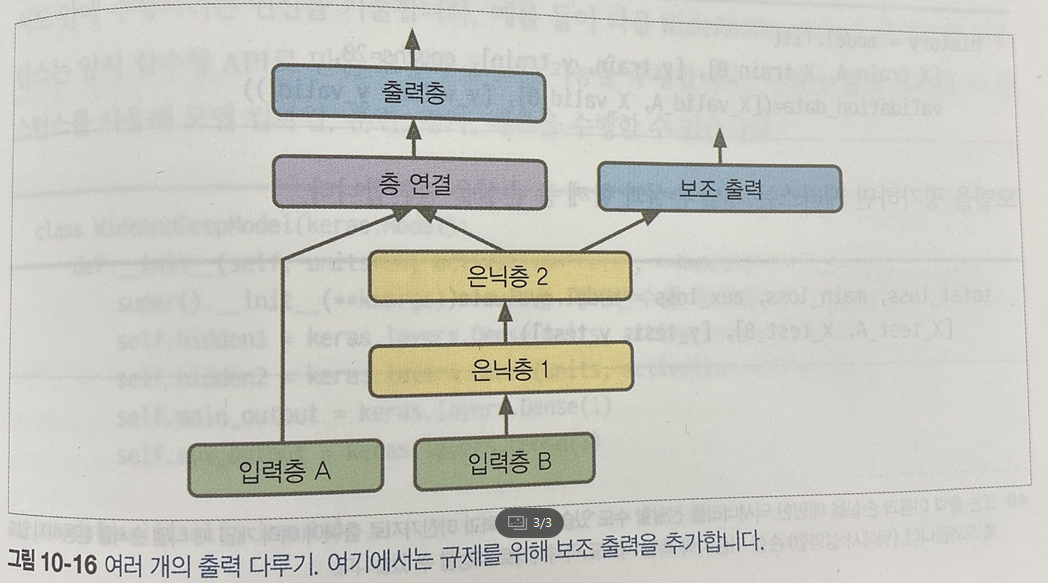